<a href="https://colab.research.google.com/github/Alyona18/intelligent-systems-HW/blob/main/second/DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from gensim import models

!pip install dataget
import dataget

In [4]:
import sys
!{sys.executable} -m pip install cmake==3.17.0
!{sys.executable} -m pip install MulticoreTSNE
!{sys.executable} -m pip install umap-learn

from MulticoreTSNE import MulticoreTSNE as tsne
from sklearn.manifold import SpectralEmbedding
from sklearn.decomposition import PCA
from umap import UMAP

### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)

#### необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.

In [14]:
pre_mnist = load_digits()
mnist = pd.DataFrame(pre_mnist.data)

In [15]:
__,__, f_mnist_x_test, f_mnist_y_test = dataget.image.fashion_mnist().get()


In [16]:
f_mnist = f_mnist_x_test.reshape(-1, 28*28)

In [17]:
import scipy.io

mat = scipy.io.loadmat("/content/drive/MyDrive/COIL20.mat")
coil20 = mat['X']


In [5]:
umap = UMAP(random_state = 2)
tsne = tsne(n_jobs=-1, random_state=2)
pca = PCA(n_components=2)

Text(0.5, 1.0, 'G-news')

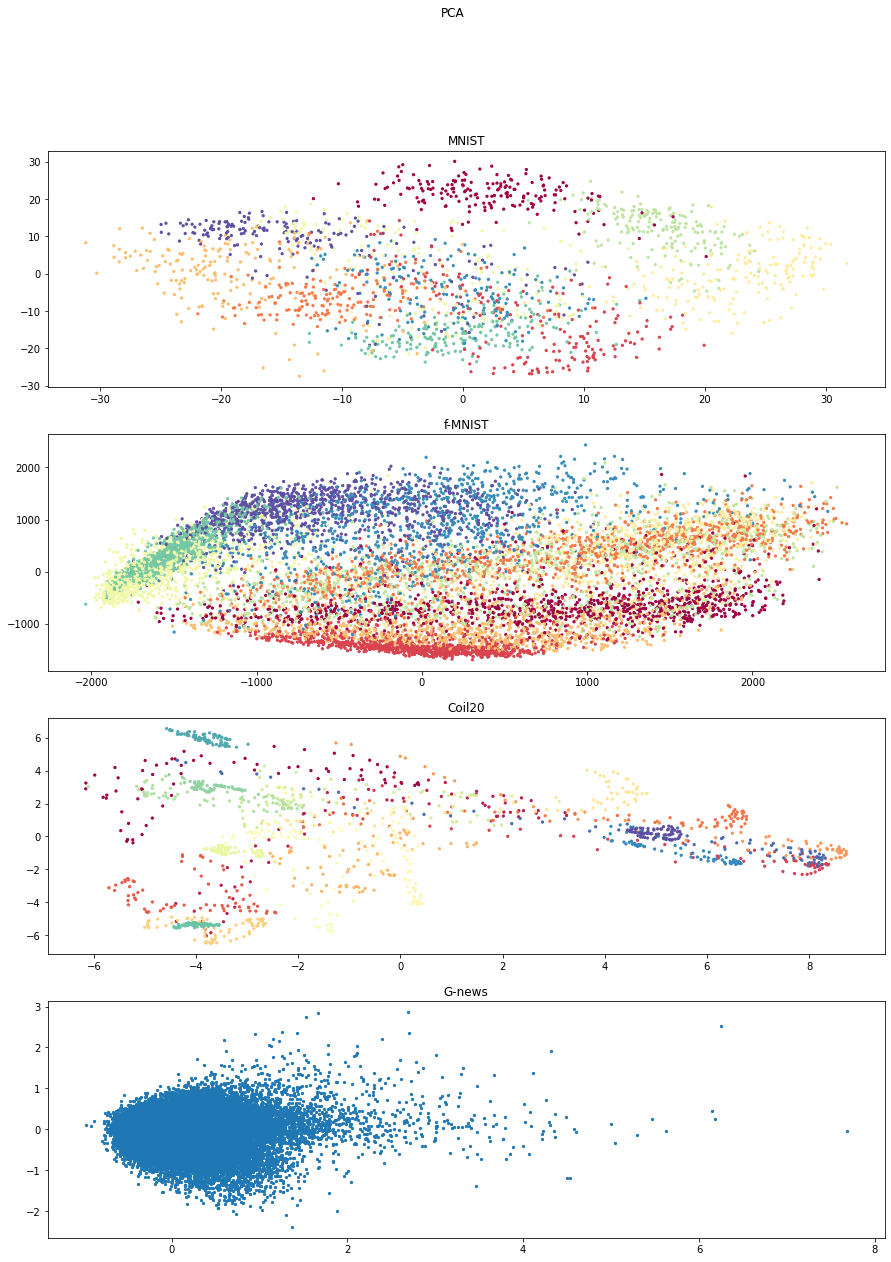

In [19]:
fig, axs = plt.subplots(4, figsize=(15, 20))
fig.suptitle('PCA')
embedding_pca_mnist = pca.fit_transform(mnist)

axs[0].scatter(embedding_pca_mnist[:,0], embedding_pca_mnist[:,1], 
                         cmap = 'Spectral', s = 5, c = pre_mnist.target)
axs[0].set_title('MNIST')

embedding_pca_f_mnist = pca.fit_transform(f_mnist)
axs[1].scatter(embedding_pca_f_mnist[:,0], 
                           embedding_pca_f_mnist[:,1], cmap = 'Spectral', s = 5, c = f_mnist_y_test)
axs[1].set_title('f-MNIST')


embedding_pca_coil20 = pca.fit_transform(coil20)

axs[2].scatter(embedding_pca_coil20[:,0], embedding_pca_coil20[:,1], 
                         cmap = 'Spectral', s = 5, c = mat['Y'])
axs[2].set_title('Coil20')


embedding_pca_G_news = pca.fit_transform(w_vectors_short)
axs[3].scatter(embedding_pca_G_news[:,0], embedding_pca_G_news[:,1], 
                         cmap = 'Spectral', s = 5)
axs[3].set_title('G-news')


Text(0.5, 1.0, 'G-news')

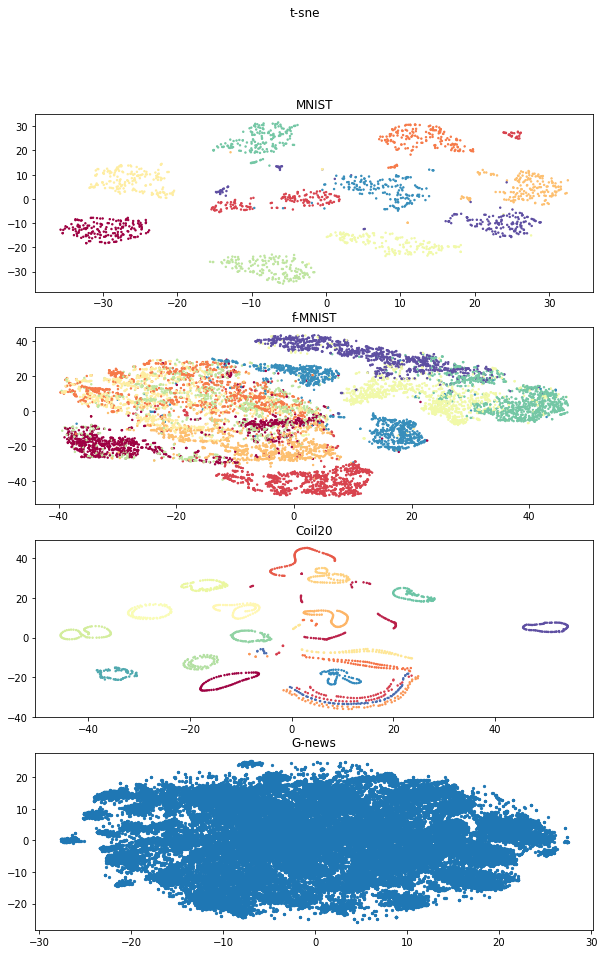

In [20]:
fig, axs = plt.subplots(4, figsize=(15, 20))
fig.suptitle('t-sne')
embedding_tsne_mnist = tsne.fit_transform(mnist)

axs[0].scatter(embedding_tsne_mnist[:,0], embedding_tsne_mnist[:,1], 
                         cmap = 'Spectral', s = 2, c = pre_mnist.target)
axs[0].set_title('MNIST')

embedding_tsne_f_mnist = tsne.fit_transform(f_mnist)
axs[1].scatter(embedding_tsne_f_mnist[:,0], 
                           embedding_tsne_f_mnist[:,1], cmap = 'Spectral', s = 2, c = f_mnist_y_test)
axs[1].set_title('f-MNIST')

embedding_tsne_coil20 = tsne.fit_transform(coil20)

axs[2].scatter(embedding_tsne_coil20[:,0], embedding_tsne_coil20[:,1], 
                         cmap = 'Spectral', s = 2, c = mat['Y'])
axs[2].set_title('Coil20')

embedding_tsne_G_news = tsne.fit_transform(w_vectors_short)
axs[3].scatter(embedding_tsne_G_news[:,0], embedding_tsne_G_news[:,1], 
                         cmap = 'Spectral', s = 5)
axs[3].set_title('G-news')

Text(0.5, 1.0, 'G-news')

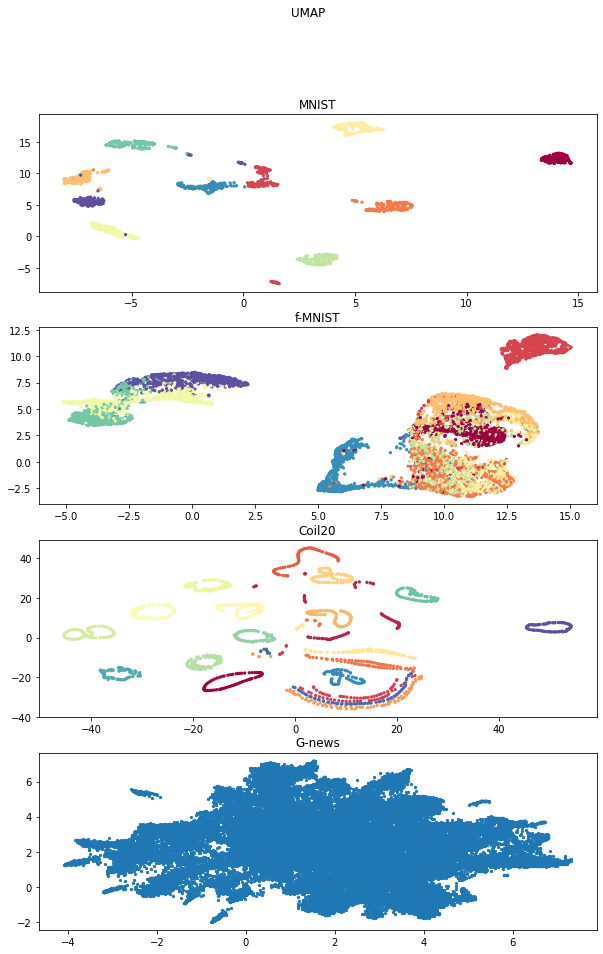

In [22]:
fig, axs = plt.subplots(4, figsize=(10, 15))
fig.suptitle('UMAP')
embedding_umap_mnist = umap.fit_transform(mnist)

axs[0].scatter(embedding_umap_mnist[:,0], embedding_umap_mnist[:,1], 
                         cmap = 'Spectral', s = 5, c = pre_mnist.target)
axs[0].set_title('MNIST')

embedding_umap_f_mnist = umap.fit_transform(f_mnist)
axs[1].scatter(embedding_umap_f_mnist[:,0], 
                           embedding_umap_f_mnist[:,1], cmap = 'Spectral', s = 5, c = f_mnist_y_test)
axs[1].set_title('f-MNIST')

embedding_umap_coil20 = umap.fit_transform(coil20)

axs[2].scatter(embedding_tsne_coil20[:,0], embedding_tsne_coil20[:,1], 
                         cmap = 'Spectral', s = 5, c = mat['Y'])
axs[2].set_title('Coil20')

embedding_umap_G_news = umap.fit_transform(w_vectors_short)
axs[3].scatter(embedding_umap_G_news[:,0], embedding_umap_G_news[:,1], 
                         cmap = 'Spectral', s = 5)
axs[3].set_title('G-news')

Google news

In [6]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

!gzip -d GoogleNews-vectors-negative300.bin.gz

w = models.KeyedVectors.load_word2vec_format(
    '/content/GoogleNews-vectors-negative300.bin', binary=True)

w_vectors = w.wv.vectors


--2021-11-19 21:47:11--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.224.128
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.224.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  83.1MB/s    in 24s     

2021-11-19 21:47:35 (66.2 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]

gzip: GoogleNews-vectors-negative300.bin already exists; do you wish to overwrite (y or n)? n
	not overwritten


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [8]:
w_vectors_short = w_vectors[np.random.randint(w_vectors.shape[0], 
                size=int(w_vectors.shape[0]/50)), :]
print(w_vectors.shape)
print(w_vectors_short.shape)

(3000000, 300)
(60000, 300)
